<a href="https://colab.research.google.com/github/vagmin27/DeepLearning/blob/main/ConvolutionalNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Utility of Convolutional Neural Network over Multilayer Perceptron

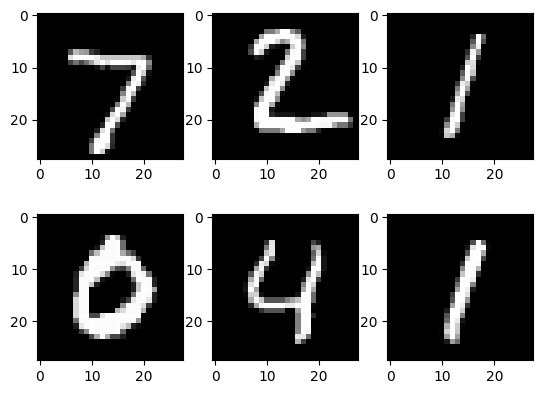

In [2]:
 import torch
 import torch.nn as nn
 import torchvision
 import torchvision.transforms as transforms
 import matplotlib.pyplot as plt

input_size = 784 # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# Import MNIST dataset
# train data
train_dataset = torchvision.datasets.MNIST(root='./data',train=True, transform=transforms.ToTensor(), download=True)
# load test data
test_dataset = torchvision.datasets.MNIST(root='./data',train=False,transform= transforms.ToTensor())

# mnist in MLP net
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)
# view
examples = iter(test_loader)
example_data, example_targets = next(examples)
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [3]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
      super(NeuralNet, self).__init__()
      self.input_size = input_size
      self.l1 = nn.Linear(input_size, hidden_size)
      self.relu = nn.ReLU()
      self.l2 = nn.Linear(hidden_size, num_classes)
  def forward(self, x):
      out = self.l1(x)
      out = self.relu(out)
      out = self.l2(out)
      return out

# device
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [4]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # origin shape: [100, 1, 28, 28]
    # resized: [100, 784]
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    # Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # To Print the Loss at every 100th step and show our total steps :
    if (i+1) % 100 == 0:
        print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/2], Step[100/600], Loss: 0.2878
Epoch [1/2], Step[200/600], Loss: 0.3521
Epoch [1/2], Step[300/600], Loss: 0.1681
Epoch [1/2], Step[400/600], Loss: 0.0920
Epoch [1/2], Step[500/600], Loss: 0.0808
Epoch [1/2], Step[600/600], Loss: 0.3182
Epoch [2/2], Step[100/600], Loss: 0.1649
Epoch [2/2], Step[200/600], Loss: 0.0486
Epoch [2/2], Step[300/600], Loss: 0.1960
Epoch [2/2], Step[400/600], Loss: 0.0951
Epoch [2/2], Step[500/600], Loss: 0.0887
Epoch [2/2], Step[600/600], Loss: 0.0889


In [5]:
 with torch.no_grad(): #deactivates autograd engine. To perform inference without Gradient Calculation. Reducex the memory usage and speed up computations.
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
      images = images.reshape(-1, 28*28).to(device)
      labels = labels.to(device)
      outputs = model(images)
      # max returns (value ,index)
      _, predicted = torch.max(outputs.data, 1)
      n_samples += labels.size(0)
      n_correct += (predicted == labels).sum().item()

#Print The Total Accuracy
acc = 100.0 * n_correct / n_samples
print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 97.08 %


In [6]:
#  mnist using CNN
import torch.nn as nn
class CNN(nn.Module):
  def __init__(self):
      super(CNN, self).__init__()
      self.conv1 = nn.Sequential(
          nn.Conv2d(
              in_channels=1,
              out_channels=16,
              kernel_size=5,
              stride=1,
              padding=2,
          ),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2),
      )
      self.conv2 = nn.Sequential(
          nn.Conv2d(16, 32, 5, 1, 2),
          nn.ReLU(),
          nn.MaxPool2d(2),
      )        # fully connected layer, output 10 classes
      self.out = nn.Linear(32 * 7 * 7, 10)
  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
    x = x.view(x.size(0), -1)
    output = self.out(x)
    return output, x    # return x for visualization

cnn = CNN()
print(cnn)
loss_func = nn.CrossEntropyLoss()

from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)
optimizer

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [7]:
num_epochs = 5
def train(num_epochs, cnn, loaders):

    # Train the model
    total_step = len(loaders['train'])

    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):

            output = cnn(images)[0]
            loss = loss_func(output, labels)

            # clear gradients for this training step
            optimizer.zero_grad()

            # backpropagation, compute gradients
            loss.backward()                # apply gradients
            optimizer.step()

            if (i+1) % 100 == 0:
              print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)
loaders = {
    'train' : torch.utils.data.DataLoader(train_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),

    'test'  : torch.utils.data.DataLoader(test_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),
}


train(num_epochs, cnn, loaders)

Epoch [1/5], Step [100/600], Loss: 0.0999
Epoch [1/5], Step [200/600], Loss: 0.1410
Epoch [1/5], Step [300/600], Loss: 0.1317
Epoch [1/5], Step [400/600], Loss: 0.0627
Epoch [1/5], Step [500/600], Loss: 0.0395
Epoch [1/5], Step [600/600], Loss: 0.1318
Epoch [2/5], Step [100/600], Loss: 0.0384
Epoch [2/5], Step [200/600], Loss: 0.0543
Epoch [2/5], Step [300/600], Loss: 0.0581
Epoch [2/5], Step [400/600], Loss: 0.0350
Epoch [2/5], Step [500/600], Loss: 0.2019
Epoch [2/5], Step [600/600], Loss: 0.0574
Epoch [3/5], Step [100/600], Loss: 0.1386
Epoch [3/5], Step [200/600], Loss: 0.0443
Epoch [3/5], Step [300/600], Loss: 0.0045
Epoch [3/5], Step [400/600], Loss: 0.0463
Epoch [3/5], Step [500/600], Loss: 0.0368
Epoch [3/5], Step [600/600], Loss: 0.0302
Epoch [4/5], Step [100/600], Loss: 0.0345
Epoch [4/5], Step [200/600], Loss: 0.0043
Epoch [4/5], Step [300/600], Loss: 0.1082
Epoch [4/5], Step [400/600], Loss: 0.1056
Epoch [4/5], Step [500/600], Loss: 0.0225
Epoch [4/5], Step [600/600], Loss:

In [8]:
def test():
    # Test the model
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            pass
        print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)

    pass
test()

Test Accuracy of the model on the 10000 test images: 0.99


### Convolution arithmetic

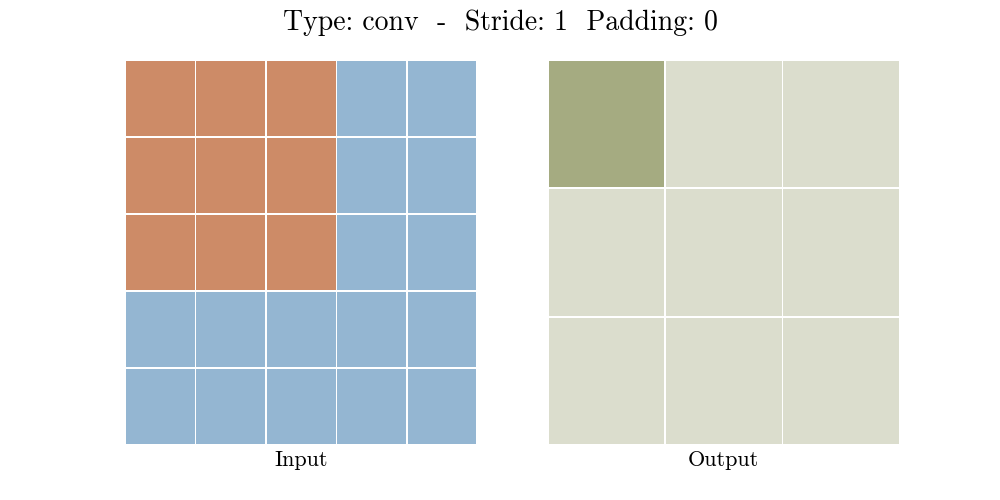

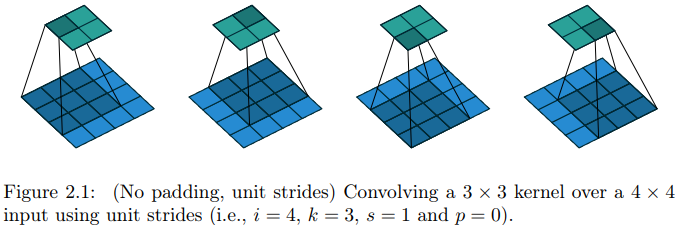


In [9]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchsummary import summary
import torch

In [10]:
# No zero padding, unit strides

i = 4; # input
k = 3; #kernel size
s = 1; #stride
p = 0; #padding
o =  (i - k) + 1
print("output size -> ",o)
print('-----------------------------------------')

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)
        self.conv1 = nn.Conv2d(1,1,k,(s,s), padding = (p, p))
    def forward(self,x):
        x=self.conv1(x)
        output = F.log_softmax(x, dim=1)
        return output

model = NeuralNet()
print('Model Summary')
summary (model, input_size=(1,i,i))


output size ->  2
-----------------------------------------
Model Summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1              [-1, 1, 2, 2]              10
Total params: 10
Trainable params: 10
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


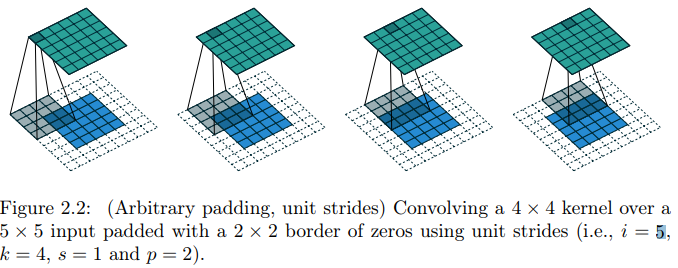

In [11]:
# zero padding, unit strides

i = 5; # input
k = 4; #kernel size
s = 1; #stride
p = 2; #padding
o =  (i - k) + 2*p + 1
print("output size -> ",o)
print('-----------------------------------------')
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)
        self.conv1 = nn.Conv2d(1,1,k,(s,s), padding = (p, p))
    def forward(self,x):
        x=self.conv1(x)
        output = F.log_softmax(x, dim=1)
        return output

model = NeuralNet()
print('Model Summary')
summary (model, input_size=(1,i,i))

output size ->  6
-----------------------------------------
Model Summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1              [-1, 1, 6, 6]              17
Total params: 17
Trainable params: 17
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


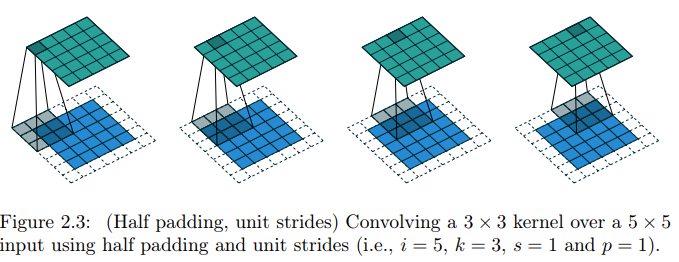

$o =  (i - k) + 2*p + 1$ <br>
Now we want $o = i$ <br>
Putting $o = i$ we get  <br>
$i =  (i - k) + 2*p + 1$ <br>
$p = (k - 1)/2$ <br>
$p = (k - 1)/2$ <br>
Therefore when k is odd to express p as integer,
$p = \lfloor k/2 \rfloor$


In [12]:
# Half (same) padding -> output size be the same as the input size (i.e., o = i)
# Having the output size be the same as the input size (i.e., o = i) can be a desirable property

i = 5; # input
k = 3; #kernel size
s = 1; #stride
p = int(np.floor(k/2)); #padding
o =  (i - k) + 2*p + 1
print("output size -> ",o)
print('-----------------------------------------')

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)
        self.conv1 = nn.Conv2d(1,1,k,(s,s), padding = (p, p))
    def forward(self,x):
        x=self.conv1(x)
        output = F.log_softmax(x, dim=1)
        return output

model = NeuralNet()
print('Model Summary')
summary (model, input_size=(1,i,i))

output size ->  5
-----------------------------------------
Model Summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1              [-1, 1, 5, 5]              10
Total params: 10
Trainable params: 10
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


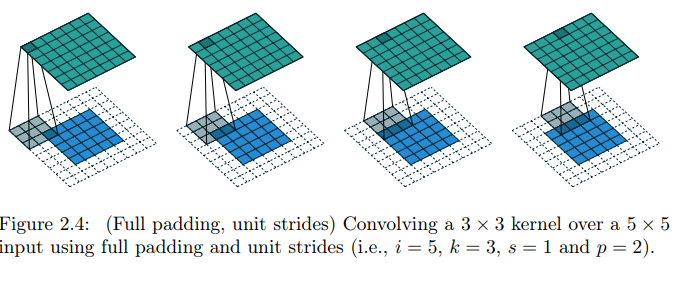

While convolving a kernel generally decreases the output size with respect to
the input size, sometimes the opposite is required. This can be achieved with
proper zero padding

In [13]:
# Full padding

i = 5; # input
k = 3; #kernel size
s = 1; #stride
p = k - 1; #padding
o =  (i - k) + 2*p + 1
print("output size -> ",o)
print('-----------------------------------------')

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)
        self.conv1 = nn.Conv2d(1,32,k,(s,s), padding = (p, p))
    def forward(self,x):
        x=self.conv1(x)
        output = F.log_softmax(x, dim=1)
        return output

model = NeuralNet()
print('Model Summary')
summary (model, input_size=(1,i,i))

output size ->  7
-----------------------------------------
Model Summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1             [-1, 32, 7, 7]             320
Total params: 320
Trainable params: 320
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


If we want to increase the output size further can we increase the padding ?<br>
Ans. Computationally yes.<br>
But there is a severe problem.


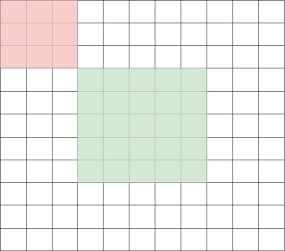

# For arbitrary padding and strides

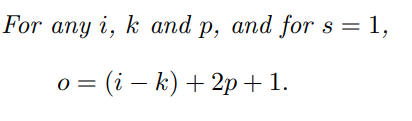

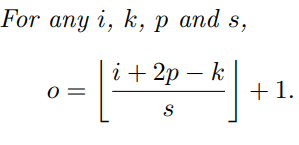

* Why division by s ?<br>
  the output size can be defined in terms of the number of possible
placements of the kernel on the input. Let’s consider the width axis: the kernel
starts as usual on the leftmost part of the input, but this time it slides by steps
of size s until it touches the right side of the input. The size of the output is
again equal to the number of steps made, plus one, accounting for the initial
position of the kernel.<br>


* why floor ?<br>
  The floor function accounts for the fact that sometimes the last possible step
does not coincide with the kernel reaching the end of the input, i.e., some input
units are left out



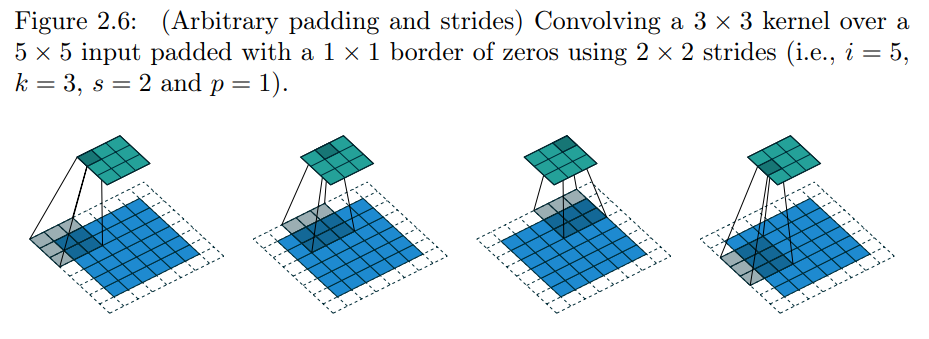

In [14]:
#  Zero padding, non-unit strides

i = 5; # input
k = 3; #kernel size
s = 2; #stride
p = 1; #padding

o =  int(np.floor((i + 2*p - k)/s)) + 1
print("output size -> ",o)
print('-----------------------------------------')

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)
        self.conv1 = nn.Conv2d(1,1,k,(s,s), padding = (p, p))

    def forward(self,x):
        x=self.conv1(x)
        output = F.log_softmax(x, dim=1)
        return output

model = NeuralNet()
print('Model Summary')
summary (model, input_size=(1,i,i))

output size ->  3
-----------------------------------------
Model Summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1              [-1, 1, 3, 3]              10
Total params: 10
Trainable params: 10
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


* The floor function means that in some cases a convolution will produce the same output size for multiple input sizes.<br>
* More specifically, if i + 2p − k is
a multiple of s, then any input size j = i + a, a ∈ {0, . . . , s − 1} will produce the same output size. Note that this ambiguity applies only for s > 1.
* but, this doesn’t affect the analysis for convolutions

In [15]:
# see when i = 6 instead of 5 we are also getting same output size
i = 6; # input
k = 3; #kernel size
s = 2; #stride
p = 1; #padding

o =  int(np.floor((i + 2*p - k)/s)) + 1
print("output size -> ",o)
print('-----------------------------------------')

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)
        self.conv1 = nn.Conv2d(1,1,k,(s,s), padding = (p, p))

    def forward(self,x):
        x=self.conv1(x)
        output = F.log_softmax(x, dim=1)
        return output

model = NeuralNet()
print('Model Summary')
summary (model, input_size=(1,i,i))

output size ->  3
-----------------------------------------
Model Summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1              [-1, 1, 3, 3]              10
Total params: 10
Trainable params: 10
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


# Pooling arithmetic

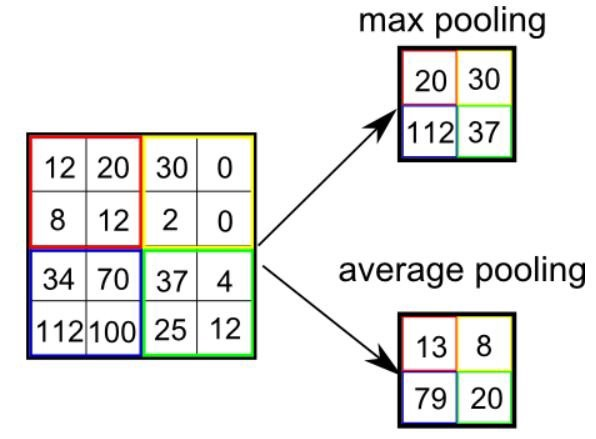

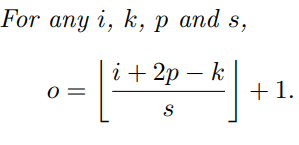

This relationship holds for any type of pooling

In [16]:
i = 28; # input
k = 3; #kernel size
s = 2; #stride
p = 0; #padding
o =  int(np.floor((i - k + 2*p)/s)) + 1
print("output size -> ",o)
print('-----------------------------------------')

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        # torch.nn.MaxPool2d(kernel_size, stride=None, padding=0)
        self.pool1 = nn.MaxPool2d(k,(s,s), padding = (p, p))
    def forward(self,x):
        x=self.pool1(x)
        # x=self.conv1(x)
        output = F.log_softmax(x, dim=1)
        return output

model = NeuralNet()
print('Model Summary')
print(model(torch.from_numpy(np.zeros([1,1,i,i]))).shape)
# summary(model,input_size=(1,i,i))

output size ->  13
-----------------------------------------
Model Summary
torch.Size([1, 1, 13, 13])


**Utility of pooling layers**
* Pooling layers are used to reduce the dimensions of the feature maps.
* Thus, it reduces the number of parameters to learn and
* thus the amount of computation performed in the network is reduced.

# Transposed convolution arithmetic

**What is transposed convolution**<br>
* A transposed convolutional layer is usually carried out for upsampling i.e. to generate an output feature map that has a spatial dimension greater than that of the input feature map.
* Just like the standard convolutional layer, the transposed convolutional layer is also defined by the padding and stride. These values of padding and stride are the one that hypothetically was carried out on the output to generate the input. i.e. if you take the output, and carry out a standard convolution with stride and padding defined, it will generate the spatial dimension same as that of the input.

**Objective of transposed convolution**
  * It is the opposite of normal convolution
  * but, opposite in terms of the size of the input, output feature map only
    * Remember:
      * the transposed convolution does not guarantee to recover the input itself,  
      * it is not defined as the inverse of the convolution,
      * in fact, it returns a feature map that has the same width and height

**Why we need it?**
  * May be at the decoding layer of a convolutional autoencoder, or
  * to project feature maps to a higher-dimensional space
  * a transposed convolution does trainable upsampling

**In terms of operation how is it different from convolution?**
  * The transposed convolutional layer does exactly what a standard convolutional layer does but on a modified input feature map.
  * in temms of parameters - difference with corresponding convolution is in terms of the padding only. Because stride and size of the kernel in both convolution and the corresponding transposed convolution remains the same, only the padding value changes.
  





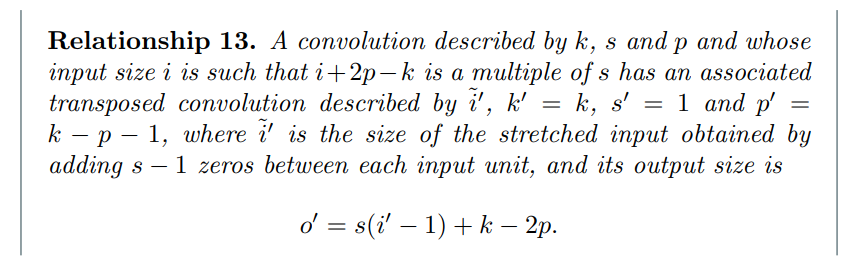

For any input size $i$, kernel size $k$, stride $s$ and padding $p$<br>
The formula for convolution is,
\begin{equation}
     o = \lfloor \frac{i + 2p - k}{s} \rfloor + 1
\end{equation}

Interchanging i and o we get,
\begin{align}
     o &= \frac{i + 2p - k}{s}  + 1 \nonumber\\
     o - 1 &= \frac{i + 2p - k}{s}  \nonumber\\
     s (o - 1) &= i + 2p - k  \nonumber\\
     i &= s (o - 1) + k - 2p \nonumber
 \end{align}

 Now for the given $i$ and $o$ we consider the equivalent transposed convolution that has input $o$ and output size $i$.<br>
However instead of $o$ and $i$ we use the notation $o', i'$ to denote the case of transposed convolution i.e., $i' = o$ and $o' = i$.<br>
Therefore the formula of output size for transposed convolution becomes,
\begin{align}
       o' &= s (i' - 1) + k - 2p \text{   (using $o'$ in place of i and $i'$ in place of o)}
\end{align}


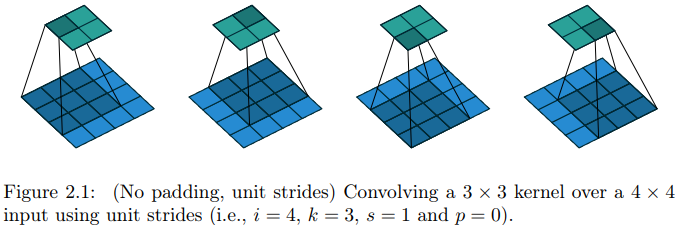


In [17]:
# No zero padding, unit strides, transposed
# i is the output of corresponding convolution and k, s, p are the parameters of that convolution

i = 2; # input
k = 3; #kernel size
s = 1; #stride
p = 0; #padding
o = (i-1) * s + k -2*p
print("output size",o)

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        # Torch.nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride=1, padding=0)
        self.convt = nn.ConvTranspose2d(1,1,k,stride = s, padding = p)
    def forward(self,x):
        x = self.convt(x)
        print(x.shape)
        output = F.log_softmax(x, dim=1)
        return output

model = NeuralNet()
print('Model Summary')
# print(model(torch.from_numpy(np.zeros([1,1,i,i]))).shape)
print("Out", model((torch.rand(1, 1, i, i))).shape)
# summary(model,input_size=(1, i, i))
# out = model()

output size 4
Model Summary
torch.Size([1, 1, 4, 4])
Out torch.Size([1, 1, 4, 4])


# In terms of operation how is it different from convolution?
  * same as standard convolution but works on modified input feature map
  * The stride and padding do not correspond to the number of zeros added around the image and the amount of shift in the kernel when sliding it across the input, as they would in a standard convolution operation.
  * It is some times called “deconvolution” in the literature. Which is inappropriate because mathematically it is not the inverse of convolution in terms of the value.
  * It merely reconstructs the spatial resolution from before and performs a convolution.
  * This may not be the mathematical inverse,
  * However, in Encoder-Decoder architectures, it’s still very helpful. This way we can combine the upscaling of an image with a convolution, instead of doing two separate processes.


Transposed convolution is also called fractionally strided convolution:
  * zeros are inserted between input units, which makes the kernel move around at a slower pace than with unit strides

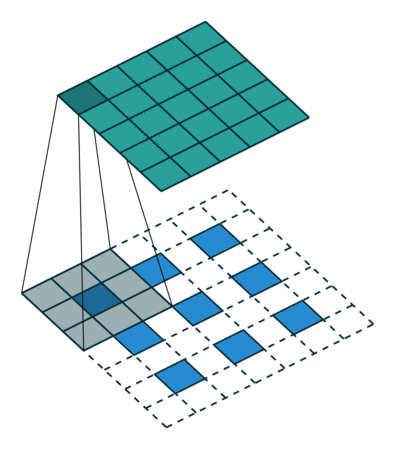

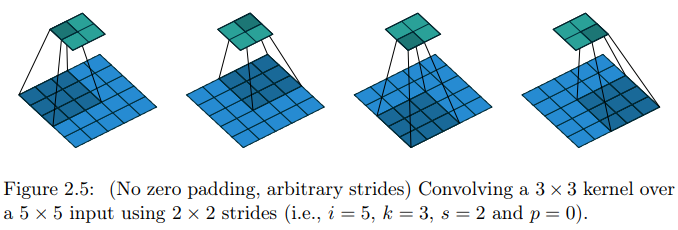

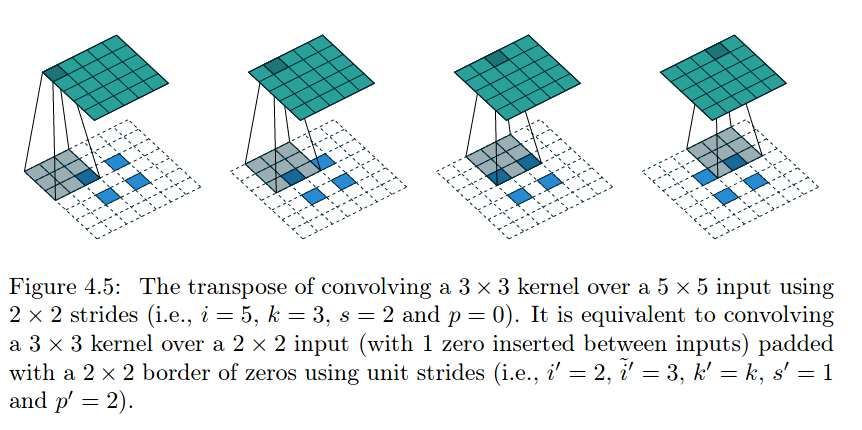

In [18]:
# i is the output of corresponding convolution and k, s, p are the parameters of that convolution

i = 2; # input
k = 3; #kernel size
s = 2; #stride
p = 0; #padding

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.convt = nn.ConvTranspose2d(1,1,k,stride = s, padding = p)
    def forward(self,x):
        x = self.convt(x)
        print(x.shape)
        output = F.log_softmax(x, dim=1)
        return output

model = NeuralNet()
print('Model Summary')
# print(model(torch.from_numpy(np.zeros([1,1,i,i]))).shape)
print("Out", model((torch.rand(1, 1, i, i))).shape)
# summary(model,input_size=(1, i, i))
# out = model()

Model Summary
torch.Size([1, 1, 5, 5])
Out torch.Size([1, 1, 5, 5])


Disadvantage?
  * It usually involves adding many columns and rows of zeros to the input, resulting in a much less efficient implementation.

# Dilated convolution arithmetic

* Dilated convolutions “inflate” the kernel by inserting spaces between the kernel elements
* The dilation “rate” is controlled by an additional hyperparameter
d.
* Usually d−1 spaces inserted between kernel elements such that d = 1 corresponds to a regular convolution
* Dilated convolutions are used to cheaply increase the receptive field of output units without increasing the kernel size.
* This is especially effective when multiple dilated convolutions are stacked one after another.





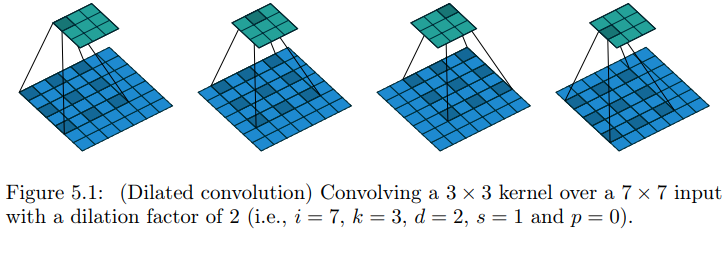

The output size of convolution is,

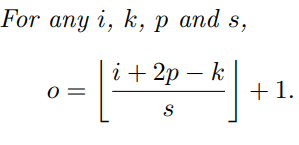

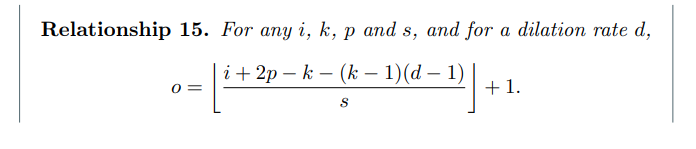

In [19]:
i = 7; # input
k = 3; #kernel size
s = 1; #stride
import numpy as np
p = 0; #padding
d = 2; #dilation
o =  int(np.floor((i - k + 2*p - (k - 1)*(d - 1))/s) + 1)
print("output size -> ",o)
print('-----------------------------------------')

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)
        self.conv1 = nn.Conv2d(1,1,k,(s,s), padding = (p, p), dilation=d)
    def forward(self,x):
        x=self.conv1(x)
        output = F.log_softmax(x, dim=1)
        return output

model = NeuralNet()
print('Model Summary')
# print(model(torch.from_numpy(np.zeros([1,1,i,i]))).shape)
summary(model,input_size=(1,i,i))

output size ->  3
-----------------------------------------
Model Summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1              [-1, 1, 3, 3]              10
Total params: 10
Trainable params: 10
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
